# **6-1 - Intro to A/B Testing**

Marketing & Customer Analytics


**Outline**

1. Review about Hypothesis Testing: Single Sample Test
2. Case 1 - Site Revenue
3. Case 2 - Advertisement
4. Case 3 - Marketplace Customer Satisfaction

### **Intro to Hypothesis Testing**


- **Hypothesis** is a statement or assumption that contains an uncertainty value (needs to be tested or proven)

   Example: the average weight of chocolate is not equal to 50 gr.

- **Hypothesis Test**, namely the process of collecting data and evaluating hypotheses (the process of proving the hypothesis).

- **Statistical Hypothesis**
   - Null hypothesis ($H_0$): Relating to the status quo as opposed to new ideas
   - Alternative hypothesis ($H_1$): Claims that will be tested for validity because they are usually new things/discoveries

- **Statistical Test** is a calculation to determine whether there is sufficient evidence to reject or fail to reject null hyporhesis ($H_0$).
<br>

- **Type of test**
     - One Sided (Right)
    $$[H_0 : \theta = \theta_0]$$
    $$[H_1 : \theta > \theta_0]$$
     - One sided (Left)
    $$[H_0 : \theta = \theta_0]$$
    $$[H_1 : \theta < \theta_0]$$
     - Two Sided
    $$[H_0 : \theta = \theta_0]$$
    $$[H_1 : \theta \neq \theta_0]$$

### **Choosing Appropriate Statistical Test for Your Problem**

- In experiments, the parameters that are often tested are the <font color="blue">mean</font> and <font color="blue">proportion</font> parameters. So it is rare to test the variance parameter.
- It is often difficult to know the population variance, because it costs a lot to collect population data, so we will work more with samples. So that more widely used to test the mean parameter is to use the t-test.


- Therefore, we will discuss more about the t-test and z-test for proportions

#### **T-Test**

T-test formula: \begin{equation}
t = \frac{\bar{x}-μ_0}{\frac{s}{\sqrt{n}}}
\end{equation}
where :<br>
$\bar{x}$ = Sample mean<br>
$μ_0$ = Population mean<br>
$s$ = Sample standard deviation<br>
$n$ = Sample size

#### **Z-Test for Proportion**

For the proportion test, we use this formula:

$$
z = \frac{\hat p- p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}
$$

keterangan :<br>
$\hat{p}$ = Sample proportion $(\hat{p}=\frac{x}{n})$<br>
$p_0$ = Population proportion<br>
$n$ = Sample size

### **Hypothesis Testing Steps**

1.   **Define hypothesis ($H_0$ dan $H_1$) and Significance Level (α)**
 - We can build statistical hypotheses based on research questions that we want to know or what claims we want to prove
 - Significance level (α) : The probability of error in rejecting $H_0$ (Type I Error).
  Usually determined by the researcher for 0.01, and 0.05.
<br>
2.   **Define statistical test and calculate the value**
  

3. **Define decision rules**
<br> In this step, we will define the rejection criteria $H_0$.
We can compare the calculated statistical test values with the critical values


4. **Make decisions and conclusions**
<br>
- Decision making on hypothesis testing based on :
  - Comparison of the value of the test statistic with the critical value
    - If the statistical test used is the z-test :
      - One-tailed (right), $z > z_{\alpha}$  → reject $H_0$
      - One-tailed (left), $z < -z_{\alpha}$ → reject $H_0$
      - Two-tailed, $z > z_{\alpha/2}$ atau $ < -z_{\alpha/2}$ → tolak $H_0$
      <br>
    - If the statistical test used is the t-test :
      - One-tailed (right), $t > t_{\alpha,df}$  → reject $H_0$
      - One-tailed (left), $t < -t_{\alpha,df}$ → reject $H_0$
      - Two-tailed, $t > t_{\alpha/2,df}$ atau $-t < -t_{\alpha/2,df}$ → reject $H_0$


- Compare p-value with alpha
  - pvalue < $\alpha$ reject → $H_0$



Notes : df is degree of freedom, its calculated with formula $n-1$


## **Study Case 1 : Site Revenue**
___________________________



- Company A conducted an experiment, namely launching a website with a new design for some of its users.
- From the sample user data, we will test whether it is true that the average revenue for the new design is more than 73 dollars.
- The company requires a confidence level of 80%.

### 1.  Import Data


In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

In [2]:
# Initialization filename
filename = "site_revenue.csv"

# Import data
data = pd.read_csv(filename)

# Display 5 top rows of the data
data.head()

,USER_ID,VARIANT_NAME,REVENUE
0,pac-688937,variant,52.3
1,pac-884319,variant,68.5
2,pac-692455,control,45.6
3,pac-801251,control,78.1
4,pac-637815,control,48.4


In [3]:
# Select only variant type
data = data[data['VARIANT_NAME']=='variant'].reset_index(drop=True)
data.head()

,USER_ID,VARIANT_NAME,REVENUE
0,pac-688937,variant,52.3
1,pac-884319,variant,68.5
2,pac-821916,variant,68.6
3,pac-853373,variant,87.6
4,pac-761154,variant,20.0


In [4]:
# Get data shape
data.shape

(444, 3)

### Data Cleaning

In [5]:
# Checking duplicate data
data.duplicated(['USER_ID']).sum()

np.int64(19)

In [6]:
# show duplicate
ids = data['USER_ID']
data_dup=data[ids.isin(ids[ids.duplicated()])].sort_values("USER_ID")
data_dup

,USER_ID,VARIANT_NAME,REVENUE
420,pac-662210,variant,7.5
439,pac-662210,variant,7.5
435,pac-727266,variant,94.3
416,pac-727266,variant,94.3
433,pac-788382,variant,85.1
414,pac-788382,variant,85.1
417,pac-799468,variant,39.0
436,pac-799468,variant,39.0
429,pac-832764,variant,130.8
410,pac-832764,variant,130.8


In [7]:
# Drop duplicate
data.drop_duplicates(subset='USER_ID',keep='first',inplace=True)  #yang di keep yang pertama karena yang pertama adalah data yg pertama kali dicatat.
data.shape

(425, 3)

In [8]:
# Checking missing value
data.isna().sum()

,0
USER_ID,0
VARIANT_NAME,0
REVENUE,0


In [9]:
# describe stats
data.describe()

,REVENUE
count,425.000000
mean,74.908235
std,42.034769
min,2.200000
25%,39.300000
50%,75.000000
75%,109.600000
max,150.000000


Text(0, 0.5, 'frequency')

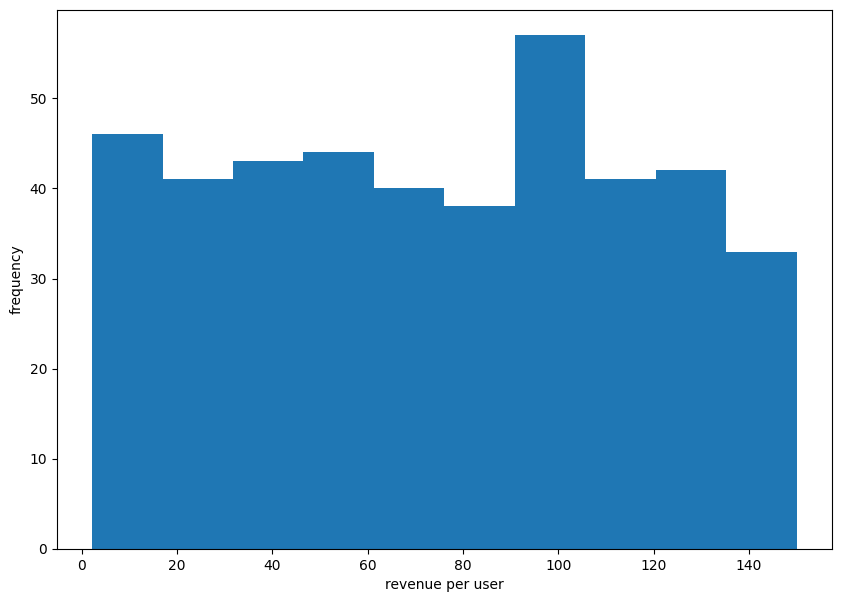

In [10]:
# bins = 10
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['REVENUE'],bins=10)

# Show plot
plt.xlabel('revenue per user')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

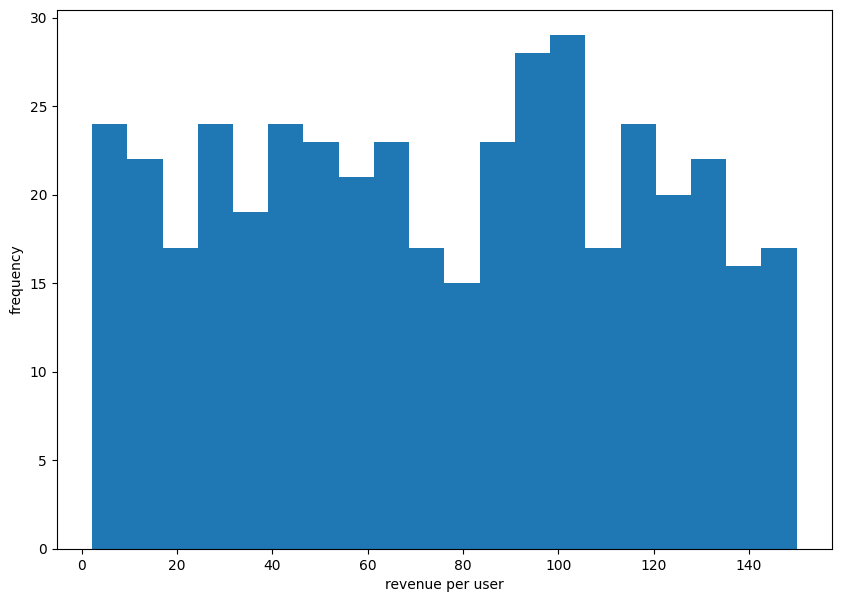

In [11]:
# bins = 20
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['REVENUE'],bins=20)

# Show plot
plt.xlabel('revenue per user')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

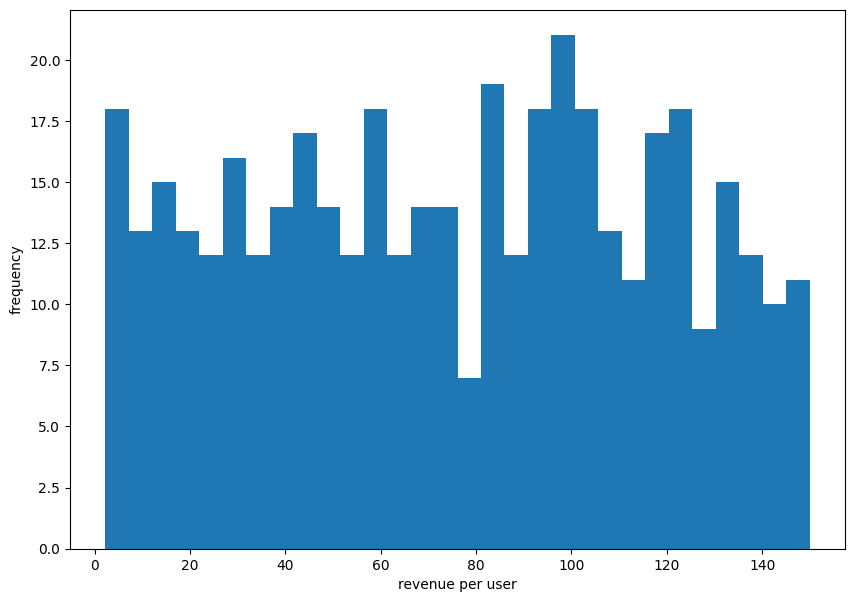

In [12]:
# bins = 30
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data['REVENUE'],bins=30)

# Show plot
plt.xlabel('revenue per user')
plt.ylabel('frequency')

<font color="blue">QUESTION!</font>

*Based on the descriptive statistics and histogram above, can you conclude that the average revenue for a new website design is over $73?*
- [ ] Yes
- [ ] No


### 3. Define $H_0, H_1$, significance level, and statistical test

Since we want to test whether the average revenue for new websites is over \$$73$, we can determine $H_0$ and $H_1$ as follow :
>$H_0$ : $\mu≤73$<br>
$H_1$ : $\mu>73$<br>

Next, we set a significant level of 0.2<br>
>$\alpha=0.2$


### 4.  Determine the statistical test and calculate it

<font color="blue">QUESTION!</font>

*Based on case company A, what statistical test is suitable*
- [ ] t-test
- [ ] z-test


<details>
    <summary><b>Click to show the answer key</b></summary>

*Based on case company A, what statistical test is suitable*
- [x] t-test
- [ ] z-test


<font color="blue">Explanation</font><br>
Site revenue data from company A is sample data, so the population variance is unknown. So that the appropriate statistical test is the t-test.

</details>

In [13]:
# import library scipy
import scipy.stats as stats

- We use the `ttest_1samp()` function to calculate the t-statistics and p-values.

```python
t_stats, pval = ttest_1samp(a = ...,
                            popmean = ...,
                            alternative = ...)
```
which
- `a` : sample data or observations
- `popmean` : Expected value in null hypothesis
- `alternative` : depending on the alternative hypothesis ($H_1$)
    - If $H_1$ is not equal to a certain value, we use `two-sided`
    - if $H_1$ is greater by a certain value, we use `less`
    - If $H_1$ is greater by a certain value, we use `greater`


In [14]:
t_stats, p_value = stats.ttest_1samp(a=data['REVENUE'],
                                     popmean=73,
                                     alternative = 'greater')

print(f"T_statistic value : {t_stats:.3f}")
print(f"P-value : {p_value:.3f}")

T_statistic value : 0.936
P-value : 0.175


### 5. Create decision rules

In [15]:
# Comparison of t-statistics with critical values
# We have to calculate the t-critical first

# t critical is the z-value at alpha
alpha = 0.2
df = data.shape[0]-1   #df = n-1

t_critical = stats.t.ppf(1 - alpha, df)
print(f"t-Critical : {t_critical:.3f}")

t-Critical : 0.842


In [16]:
# Make decisions from t-stats and t-crit
if t_stats > t_critical:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [17]:
# Comparison of P-Value with alpha.
if(p_value <  alpha):
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


### 6. Visualization


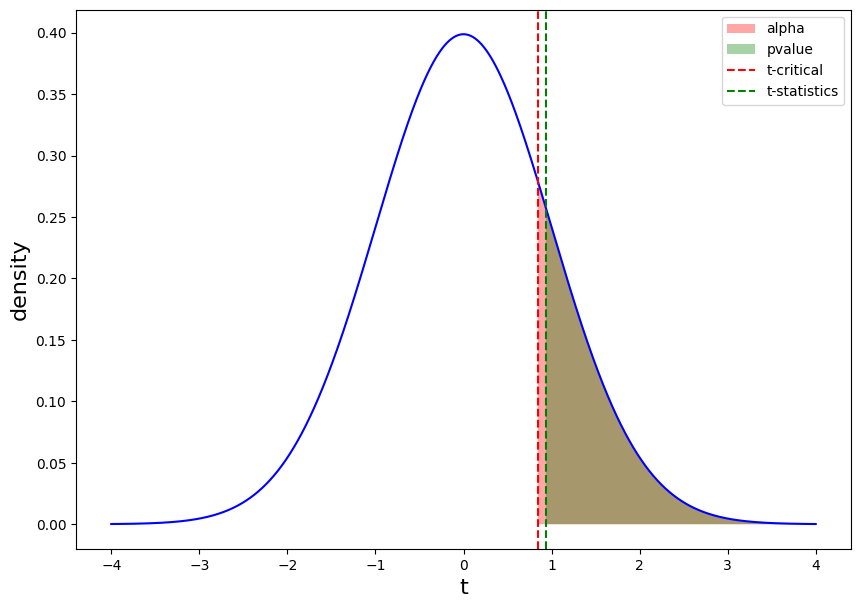

t-statistics: 0.9359
t-critical : 0.8425


In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot sample distribution
x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.t.pdf(x_sample,df)
ax.plot(x_sample, y_sample,
        color = "blue")

# Plot alpha region (red)
x_alpha = np.arange(t_critical, 4., 0.001)
y_alpha = stats.t.pdf(x_alpha,df)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red",
                alpha = .35,
                label = "alpha")


# plot sample region (green)
x_test = np.arange(t_stats, 4., 0.001)
y_test = stats.t.pdf(x_test,df)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green",
                alpha = .35,
                label = "pvalue")


# Plot vertical line alpha
ax.axvline(t_critical,
           color = "red",
           linestyle = "--",
           label = "t-critical")

# Plot vertical line test
ax.axvline(t_stats,
           color = "green",
           linestyle = "--",
           label = "t-statistics")

# Styling plot
ax.set_xlabel("t", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=10)
plt.show()

print(f"t-statistics: {t_stats:.4f}")
print(f"t-critical : {t_critical:.4f}")

### 7. Conclusion

- With a CL of 80%, the decision to test the hypothesis using both p-value and t-statistics gives the same result, so the decision is rejecting $H_0$.

- So, we can conclude that the website revenue earned from the new design is greater than 73 dollars or less than equal to 73 dollars.

----
### Hypothesis Testing with confidence level 5%
----

In [19]:
t_stats2, p_value2 = stats.ttest_1samp(a=data['REVENUE'],
                                     popmean=73,
                                     alternative = 'greater')

print(f"T_statistic value : {t_stats:.3f}")
print(f"P-value : {p_value:.3f}")

T_statistic value : 0.936
P-value : 0.175


In [20]:
# Comparison of t-statistics with critical values
# We have to calculate the t-critical first

# t critical is the z-value at alpha
alpha2 = 0.05
df2 = data.shape[0]-1   #df = n-1

t_critical2 = stats.t.ppf(1 - alpha2, df2)
print(f"t-Critical : {t_critical2:.3f}")

t-Critical : 1.648


In [21]:
# Make decisions from t-stats and t-crit
if t_stats2 > t_critical2:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Fail to Reject Null Hypothesis


In [22]:
# Comparison of P-Value with alpha.
if(p_value2 <  alpha2):
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Fail to Reject Null Hypothesis


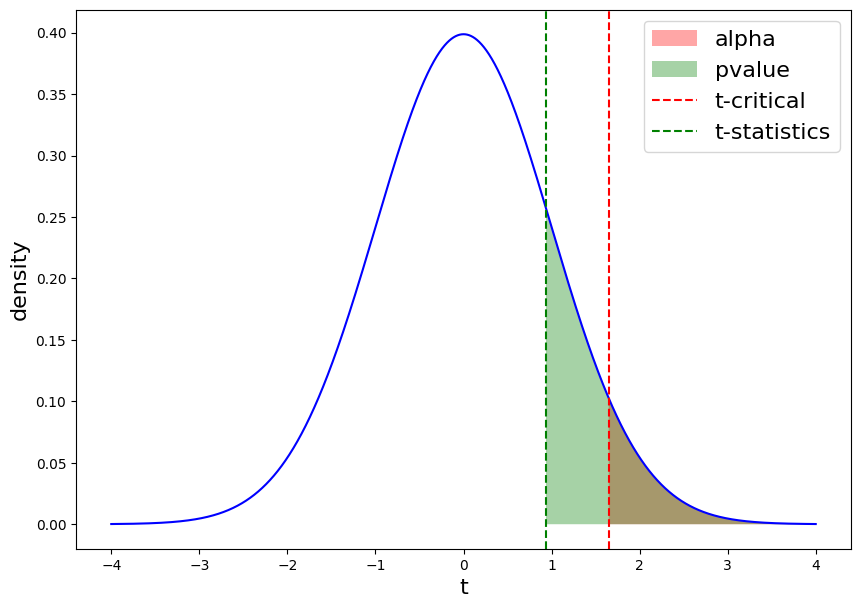

t-statistics: 0.9359
t-critical : 1.6485


In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot sample distribution
x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.t.pdf(x_sample,df)
ax.plot(x_sample, y_sample,
        color = "blue")

# rejection region (red)
x_alpha = np.arange(t_critical2, 4., 0.001)
y_alpha = stats.t.pdf(x_alpha,df)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red",
                alpha = .35,
                label = "alpha")


# sample region (green)
x_test = np.arange(t_stats2, 4., 0.001)
y_test = stats.t.pdf(x_test,df)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green",
                alpha = .35,
                label = "pvalue")


# Plot vertical line alpha
ax.axvline(t_critical2,
           color = "red",
           linestyle = "--",
           label = "t-critical")

# Plot vertical line test
ax.axvline(t_stats2,
           color = "green",
           linestyle = "--",
           label = "t-statistics")

# Styling plot
ax.set_xlabel("t", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=16)
plt.show()

print(f"t-statistics: {t_stats2:.4f}")
print(f"t-critical : {t_critical2:.4f}")

## **Study Case 2 : Advertisement**
___


- A cosmetic company recently introduced their new product.
- To introduce this cosmetic product, the company plans to use advertisements, but the cost of serving these advertisements is quite expensive.
- Therefore, before an advertisement is actually used for a long period of time, the company conducts a trial of the advertisement for one month as a sample of the advertisement.
- From this ad, the company says it gets an average conversion rate of 23%.
- Is that true? Let's prove it by doing a hypothesis test.

### 1. Import Data


In [25]:
# Initialization filename
filename = "website_advertisement.csv"

# Import data
data_ad = pd.read_csv(filename)

# Display 5 top rows of the data
data_ad.head()

,Date,Viewers,Purchasers
0,01-08-09,1069,255
1,02-08-09,1548,677
2,03-08-09,2367,578
3,04-08-09,1437,340
4,05-08-09,858,768


In [26]:
# Get data shape
data_ad.shape

(30, 3)

In [27]:
# Checking missing value
data_ad.isna().sum()

,0
Date,0
Viewers,0
Purchasers,0


In [28]:
# check duplicate based on date
data_ad.duplicated(['Date']).sum()

np.int64(0)

<Axes: xlabel='Date'>

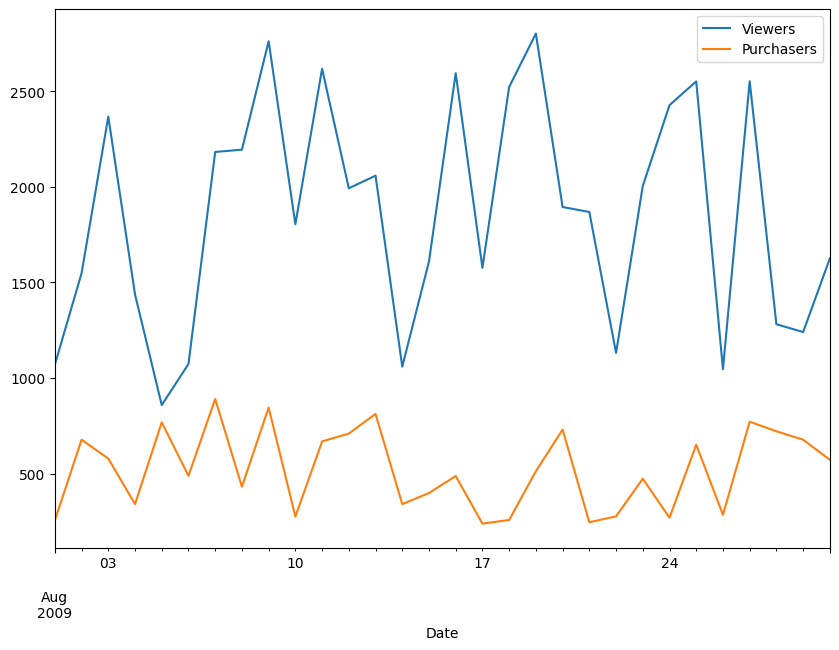

In [29]:
# create timeseries plot
data_ad["Date"] = pd.to_datetime(data_ad["Date"], format='%d-%m-%y')
data_ad.plot(x="Date", y=["Viewers","Purchasers"], figsize=(10,7))

### 2. Calculate Conversion Rate

In [30]:
data_ad['conversion_rate'] = (data_ad['Purchasers']/data_ad['Viewers'])
data_ad.head()

,Date,Viewers,Purchasers,conversion_rate
0,2009-08-01,1069,255,0.238541
1,2009-08-02,1548,677,0.437339
2,2009-08-03,2367,578,0.244191
3,2009-08-04,1437,340,0.236604
4,2009-08-05,858,768,0.895105


In [31]:
# desc stats
data_ad['conversion_rate'].describe()

,conversion_rate
count,30.000000
mean,0.305470
std,0.162963
min,0.101903
25%,0.206341
50%,0.255224
75%,0.378052
max,0.895105


Text(0, 0.5, 'frequency')

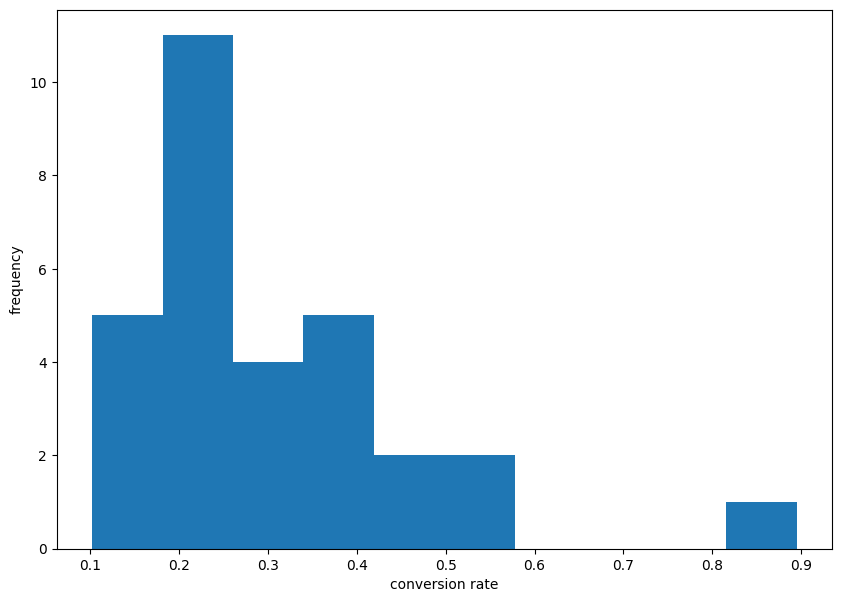

In [32]:
# histogram plot
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(data_ad['conversion_rate'])

# Show plot
plt.xlabel('conversion rate')
plt.ylabel('frequency')

### 3. Define $H_0, H_1$, significance level

We want to test whether the average conversion rate is 23%. So, we can create $H_0$ dan $H_1$ as follow :
>$H_0$ : $\mu=0.23$<br>
$H_1$ : $\mu\neq0.23$<br>

Significance level<br>
>$\alpha=0.05$


### 4. Calculate Statistic Test  

In [33]:
# Calculate Statistical Test
t_statistic_ad, p_value_ad = stats.ttest_1samp(a=data_ad['conversion_rate'],
                                         popmean=0.23,
                                         alternative='two-sided')
print(f"T_statistic value : {t_statistic_ad:.4f}")
print(f"P-value : {p_value_ad:.4f}")

T_statistic value : 2.5366
P-value : 0.0168


### 5. Create decision rules


In making statistical test decisions, we can use:
- Comparison of t-statistics with critical value
    - Two-tailed, $-t < -t_{\alpha/2,df}$ or $t > t_{\alpha/2,df}$ → reject $H_0$


- Comparison p-value with alpha
  - pvalue < $\alpha$ reject → $H_0$



Notes : df is the degree of freedom, calculated by $n-1$


In [34]:
# Comparison of t-statistics with critical values
# We have to calculate the t-critical first

# t critical is the t-value at alpha
alpha = 0.05
df = data_ad.shape[0]-1   #df = n-1

t_critical_ad = stats.t.ppf(1 - alpha/2, df)
print(f"T-Critical : {-t_critical_ad:.3f} and {t_critical_ad:.3f}")

T-Critical : -2.045 and 2.045


In [35]:
#Melakukan pengambilan keputusan dari t-stats dan t-crit
if t_statistic_ad < -t_critical_ad or t_statistic_ad > t_critical_ad:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [36]:
# Comparison of P-Value with alpha.
if(p_value_ad <  alpha/2):
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


### 6. Visualization


- We try to visualize the results of this statistical test.
- We visualize in the graph the distribution of the value of $t$

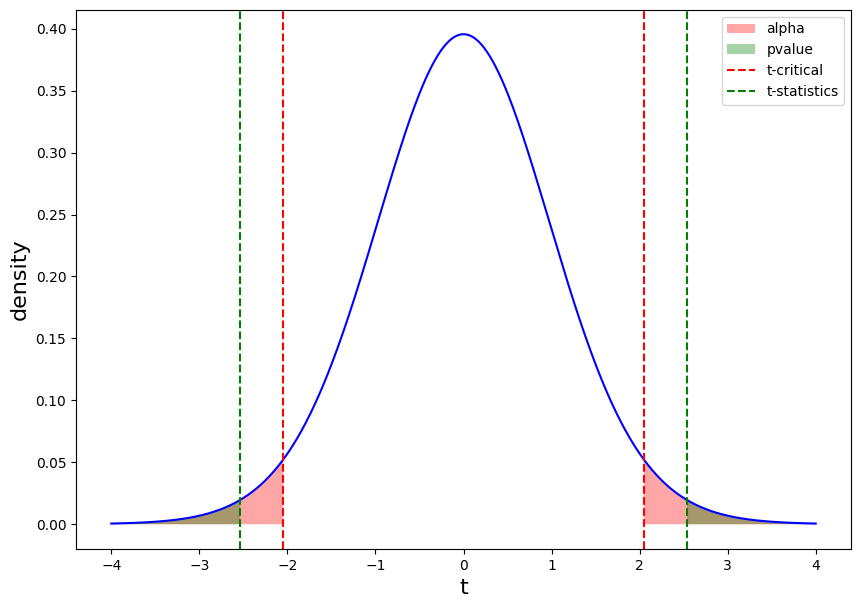

-t-statistics:-2.5366
t-statistics: 2.5366
-t-critical : -2.0452
t-critical : 2.0452


In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot sample distribution
x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.t.pdf(x_sample,df)
ax.plot(x_sample, y_sample,
        color = "blue")

# rejection region (red)
x_alpha = np.arange(t_critical_ad, 4., 0.001)
y_alpha = stats.t.pdf(x_alpha,df)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red",
                alpha = .35,
                label = "alpha")

x_alpha = np.arange(-4,-t_critical_ad, 0.001)
y_alpha = stats.t.pdf(x_alpha,df)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red",
                alpha = .35)

# sample (green)
x_test = np.arange(t_statistic_ad, 4., 0.001)
y_test = stats.t.pdf(x_test,df)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green",
                alpha = .35,
                label = "pvalue")
x_test = np.arange(-4.,-t_statistic_ad, 0.001)
y_test = stats.t.pdf(x_test,df)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green",
                alpha = .35)

# Plot vertical line alpha
ax.axvline(t_critical_ad,
           color = "red",
           linestyle = "--",
           label = "t-critical")
ax.axvline(-t_critical_ad,
           color = "red",
           linestyle = "--")

# Plot vertical line test
ax.axvline(t_statistic_ad,
           color = "green",
           linestyle = "--",
           label = "t-statistics")
ax.axvline(-t_statistic_ad,
           color = "green",
           linestyle = "--")

# Styling plot
ax.set_xlabel("t", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=10)
plt.show()

print(f"-t-statistics:{-t_statistic_ad:.4f}")
print(f"t-statistics: {t_statistic_ad:.4f}")
print(f"-t-critical : {-t_critical_ad:.4f}")
print(f"t-critical : {t_critical_ad:.4f}")

### 7. Calculation

## **Additional Advertisement Cases**

- After discussing with the finance team, the ad serving costs will be covered and profit if the average conversion rate is more than 23%.
- Based on the results of the previous hypothesis test, it was found that the average conversion rate is not equal to 23%.
- But we don't know, it's not the same as 23%, is it less than or more than.
- Do a hypothesis test to prove whether this ad serving can be profitable?

___

#### 1. Define $H_0, H_1$,and significance level
We want to test whether the average conversion rate is more than 23%. So, we can create $H_0$ and $H_1$ as follows :
>$H_0$ : $\mu≤0.23$<br>
$H_1$ : $\mu>0.23$<br>

Significance level<br>
>$\alpha=0.05$



#### 2. Calculate Statistic Test  

- Remember, because we want to use the one tail (right) test, the `altenative` in the `stats.ttest_1samp` function must be replaced with 'greater'

In [38]:
# Statistical Test
t_statistic_ad, p_value_ad = stats.ttest_1samp(a=data_ad['conversion_rate'],
                                         popmean=0.23,
                                         alternative='greater')
print(f"T_statistic value : {t_statistic_ad:.4f}")
print(f"P-value : {p_value_ad:.4f}")

T_statistic value : 2.5366
P-value : 0.0084


#### 3. Create decision rule


In making statistical test decisions, we can use:
- Comparison of t-statistics with critical value
    - One-tailed (right), $t > t_{\alpha,df}$  → reject $H_0$

- Comparison p-value with alpha
  - pvalue < $\alpha$ → reject $H_0$

In [39]:
# Comparison of t-statistics with critical values
# We have to calculate the t-critical first

# t critical is the t-value at alpha
alpha = 0.05
df = data_ad.shape[0]-1   #df = n-1

t_critical_ad = stats.t.ppf(1 - alpha, df)
print(f"T-Critical : {t_critical_ad:.3f}")

T-Critical : 1.699


In [40]:
# Make decisions from t-stats and t-crit
if t_statistic_ad > t_critical_ad:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [41]:
# Compare P-Value with alpha.
if(p_value_ad <  alpha):
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


#### 4. Visualization


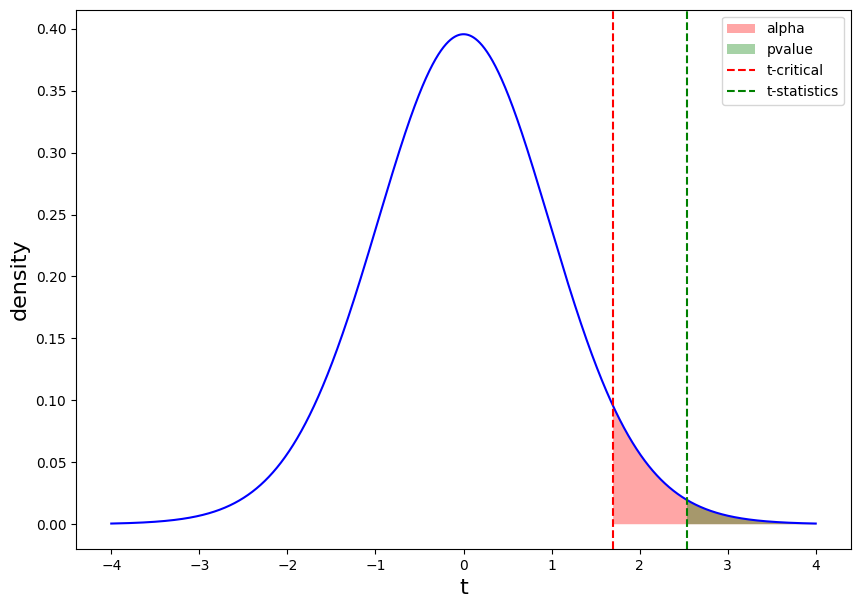

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot sample distribution
x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.t.pdf(x_sample,df)
ax.plot(x_sample, y_sample,
        color = "blue")

# rejection region
x_alpha = np.arange(t_critical_ad, 4., 0.001)
y_alpha = stats.t.pdf(x_alpha,df)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red",
                alpha = .35,
                label = "alpha")

# sample (green)
x_test = np.arange(t_statistic_ad, 4., 0.001)
y_test = stats.t.pdf(x_test,df)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green",
                alpha = .35,
                label = "pvalue")

# Plot vertical line alpha
ax.axvline(t_critical_ad,
           color = "red",
           linestyle = "--",
           label = "t-critical")

# Plot vertical line test
ax.axvline(t_statistic_ad,
           color = "green",
           linestyle = "--",
           label = "t-statistics")

# Styling plot
ax.set_xlabel("t", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.legend(fontsize=10)
plt.show()


#### 5. Conclusion

The decision from the hypothesis test is to reject $H_0$. So, we can conclude that the average conversion rate of ads is more than 23%.

Data source : [Kaggle (with changes)](https://www.kaggle.com/datasets/ilkeryildiz/example-dataset-for-ab-test?select=test_group.csv)

## **Study Case 3 : Market Place Customer Satisfaction**
___


- PacShop is a shop in the online marketplace that sells bootcamp data products.
- For the marketing needs of the newest bootcamp product, PacShop wants to display user satisfaction in its promotional materials.
- From previous marketing promotions, it is known that more than 70% of users are satisfied.
- As a data analyst at PacShop, you want to update the user satisfaction level again.
- After conducting a survey, you get data that 155 out of 200 customers are satisfied.
- Based on these results, is it necessary to update the previous level of user satisfaction?

### 1. Define $H_0, H_1$, significance level

From the survey results, we want to prove whether the results of the user satisfaction level in the promotional material are the same as before or not. It is known that the previous user satisfaction level was more than 70%. So the hypothesis is:<br>
$H_0 : p_0 = 0.7$<br>
$H_1 : p_0 > 0.7$<br>

Significance level :<br>
$α = 0.05$<br>

### 2. Calcualte statistical test


We use sample proportions to infer the level of customer satisfaction in the population. So the statistical test used is the z-test for proportion

- We use the `proportion_ztest()` function to calculate z-statistics and p-values.

```python
zstats, pval = proportions_ztest(count = ...,
                                 nobs = ...,
                                 value = ...,
                                 alternative = ...)
```
Given :
- `count` : number of successes
- `nobs` : number of observations
- `value` : the proportion of the population is hypothesized
- `alternative` :
   - If $H_{1}$ is greater than a value, use `larger`
   - If $H_{1}$ is smaller than a value, use `smaller`
   - In this case, we use `larger` because we want to prove $H_1 : p_0 > 0.7$

In [43]:
# import proportion_ztest function
from statsmodels.stats.proportion import proportions_ztest

# perform one-sample proportion z-test
z_stat, p_value = proportions_ztest(count = 155, nobs = 200, value=0.7, alternative='larger')

print(f"z stats : {z_stat:.3f}")
print(f"p-value : {p_value:.3f}")

z stats : 2.540
p-value : 0.006


### 3. Create decision rules


In making statistical test decisions, we can use:
- Compare z-statistics with critical value
    - One-tailed (right), $z > z_{\alpha}$  → tolak $H_0$

- Compare p-value with alpha
  - pvalue < $\alpha$ → reject $H_0$

In [44]:
# critical value
alpha= 0.05
z_crit = stats.norm.ppf(1-alpha)

print(f"z critical value : {z_crit:.4f}")

z critical value : 1.6449


In [45]:
# Make decisions from z-stats and z-crit
if z_stat > z_crit:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [46]:
# Compare P-Value with alpha.
if p_value<0.05:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


### 4. Visualization


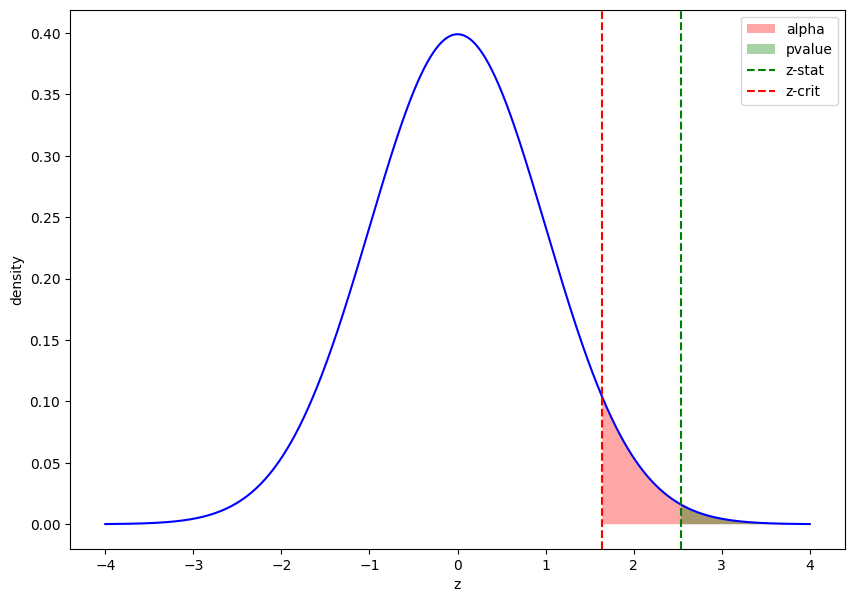

z statistics : 2.5400
z critical : 1.6449


In [47]:
fig = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# plot sample distribution
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1),
         color='blue')

# plot alpha region
x_alpha = np.arange(z_crit,4, 0.01)
y_alpha = stats.norm.pdf(x_alpha)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(z_stat,4, 0.01)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot z-crit and z-stats
plt.axvline(np.round(z_stat, 4),
            color ="green",
            linestyle = "--",
            label ="z-stat")

plt.axvline(z_crit,
            color ="red",
            linestyle = "--",
            label ="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")
plt.show()

print(f"z statistics : {z_stat:.4f}")
print(f"z critical : {z_crit:.4f}")

### 5. Conclusion

The decision from this hypothesis test is to reject $H_0$.
So it can be concluded that the satisfaction level of PacShop users based on the current survey results is more than 70%, which results are still the same as the previous level of satisfaction.


If Pacshop increases the confidence level to 99%, will the result still be the same?

In [48]:
# import proportion_ztest function
from statsmodels.stats.proportion import proportions_ztest

# perform one-sample proportion z-test
z_stat, p_value = proportions_ztest(count = 155, nobs = 200, value=0.7, alternative='larger')
print(f"z stats : {z_stat:.4f}")
print(f"p-value : {p_value:.4f}")

z stats : 2.5400
p-value : 0.0055


In [49]:
# calculate critical value
z_crit = stats.norm.ppf(1-0.01)
print(f"z critical value : {z_crit:.4f}")

z critical value : 2.3263


In [50]:
# Compare Z-Stats and Z-Critical
if z_stat > z_crit:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis


In [51]:
# Decision rule based on pvalue
if p_value<0.01:
  print("Decision : Reject Null Hypothesis")
else:
  print("Decision : Fail to Reject Null Hypothesis")

Decision : Reject Null Hypothesis
